# Deep Learning
# DL Proyecto Transfer Learning



El aprendizaje por transferencia (**Transfer Learning**) es un método de aprendizaje automático en el que un modelo desarrollado para una tarea se reutiliza como punto de partida para un modelo en una segunda tarea.

Es un enfoque popular en el aprendizaje profundo en el que los modelos previamente entrenados se utilizan como punto de partida en la visión por computadora y las tareas de procesamiento del lenguaje natural, dados los vastos recursos informáticos y de tiempo necesarios para desarrollar modelos de redes neuronales sobre estos problemas y los enormes saltos en las habilidades. que proporcionan sobre problemas relacionados.

## ¿Que es transfer learning?

La transferencia de aprendizaje y la adaptación de dominio se refieren a la
situación en la que lo que se ha aprendido en un entorno ... posteriormente se explota para mejorar la generalización en otro entorno.

1. Bengio, Y., Goodfellow, I., & Courville, A. (2017). Deep learning (Vol. 1). Massachusetts, USA:: MIT press.

El aprendizaje por transferencia es la mejora del aprendizaje en una nueva tarea mediante la transferencia de conocimientos de una tarea relacionada que ya se ha aprendido.

2. Olivas, E. S., Guerrero, J. D. M., Martinez-Sober, M., Magdalena-Benedito, J. R., & Serrano, L. (Eds.). (2009). Handbook of research on machine learning applications and trends: Algorithms, methods, and techniques: Algorithms, methods, and techniques. IGI Global.

El aprendizaje por transferencia está relacionado con problemas como el aprendizaje multitarea y la deriva de conceptos y no es exclusivamente un área de estudio para el aprendizaje profundo.

Sin embargo, el aprendizaje por transferencia es popular en el aprendizaje profundo dados los enormes recursos necesarios para entrenar modelos de aprendizaje profundo o los grandes y desafiantes conjuntos de datos en los que se entrenan los modelos de aprendizaje profundo.



El aprendizaje por transferencia solo funciona en el aprendizaje profundo si las características del modelo aprendidas en la primera tarea son generales.



![Convolucion](https://drive.google.com/uc?export=view&id=1qUfvP-YW5KoW48548ywZzhpBF4-uUuFy)







El objetivo de la transferencia de aprendizaje es mejorar el aprendizaje en la tarea objetivo aprovechando el conocimiento de la tarea de origen. Hay tres medidas comunes mediante las cuales la transferencia puede mejorar el aprendizaje. Primero es el rendimiento inicial alcanzable en la tarea objetivo utilizando solo el conocimiento transferido, antes de cualquier se realiza un mayor aprendizaje, en comparación con el desempeño inicial de un agente ignorante. Segundo es la cantidad de tiempo que se necesita para aprender completamente la tarea objetivo dado el conocimiento transferido en comparación con la cantidad de  horas en aprenderlo desde cero. En tercer lugar, se compara el nivel de rendimiento final alcanzable en la tarea objetivo
al nivel final sin traspaso.

![Convolucion](https://drive.google.com/uc?export=view&id=1zsA9JaTsW_PRdFmzO7OSEwYzN1NXv8C5)




La forma de aprendizaje por transferencia que se utiliza en el aprendizaje profundo se denomina transferencia inductiva. Aquí es donde el alcance de los posibles modelos se reduce de una manera beneficiosa mediante el uso de un modelo que se ajusta a una tarea diferente pero relacionada. Otra área importante está en el contexto del aprendizaje por refuerzo e implica la extensión de algoritmos como Q-learning y búsqueda de políticas.

En una tarea de aprendizaje inductivo, el objetivo es inducir un modelo predictivo a partir de un conjunto de ejemplos de entrenamiento. (Mitchell, 1997). A menudo, el objetivo es la clasificación, es decir, asignar etiquetas de clase a los ejemplos. Ejemplos de Los sistemas de clasificación son redes neuronales artificiales y aprendices de reglas simbólicas. Otro tipo de inductivo

Mitchell, T. (1997). Machine learning. New York: McGraw-Hill.

Metodología

1. Seleccione el modelo de origen. Se elige un modelo de origen entrenado previamente entre los modelos disponibles. Muchas instituciones de investigación publican modelos en conjuntos de datos grandes y desafiantes que pueden incluirse en el grupo de modelos candidatos entre los que elegir.

2. Modelo de reutilización. El modelo previamente entrenado se puede utilizar como punto de partida para un modelo en la segunda tarea de interés. Esto puede implicar el uso total o parcial del modelo, según la técnica de modelado utilizada.

3. Sintonizar modelo. Opcionalmente, el modelo puede necesitar ser adaptado o refinado en los datos del par de entrada-salida disponibles para la tarea de interés.

## <font color='green'>**Proyecto 7**</font>

Utilizando el dataset de entrenamiento compartido en el link siguiente y algun modelo pre entrenado como por ejemplo inceptionv3 o resnet, resuelva el problema de clasificacione de imagenes de perros y gatos.

https://drive.google.com/drive/folders/1QgDd4-MpVPkZJIHqoeoU2J1BjL2UHVaC?usp=sharing

Posteriormente verifiquelo con el siguiente conjunto de datos.

https://drive.google.com/drive/folders/1ggWZk2Ywpg4oFgux-s32rOuWg6LLG2_M?usp=sharing

Se sugiere utilizar dos aproximaciones:

Transfer Learning: tome una ConvNet que haya sido previamente entrenada en ImageNet por ejemplo, elimine la última capa fully connected y luego trate el resto de ConvNet como un extractor de características para el nuevo conjunto de datos. Una vez que extraiga las características de todas las imágenes, entrene un clasificador para el nuevo conjunto de datos.

Este metodo se puede mejorar utilizando

Ajuste fino: reemplace y reentrene el clasificador en la parte superior de ConvNet, y también ajuste los pesos de la red preentrenada mediante retropropagación.



Uttilizaremos InceptionV3

# Modelo Base

## Instanciación del modelo base

In [1]:
# Primero importar librerías, incluyendo el modelo InceptionV3
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

# Instanciamos el modelo con los pesos 'imagenet'. La alternativa es usar pesos 'random',
# pero no es nuestra intención modificar este modelo porque será nuestra base
model = InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Vemos la estructura de la red
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

Para visualizar de mejor manera, esta esta es la arquitectura del modelo:

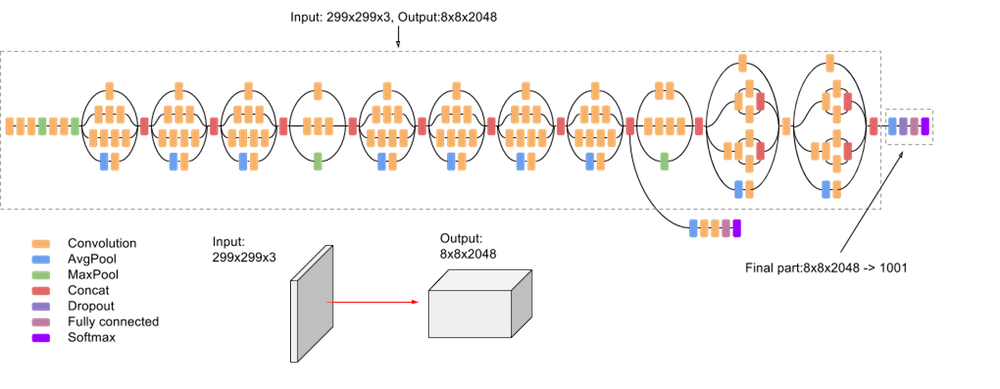

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# imports para instanciar dataset test
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image
import glob

## Carga del dataset

In [5]:
ruta_test = "/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test"

# Rutas a las carpetas de perros y gatos
ruta_perros = os.path.join(ruta_test, "dog")
ruta_gatos = os.path.join(ruta_test, "cat")

In [6]:
# Función para cargar imágenes desde una carpeta
def cargar_imagenes(ruta_carpeta, etiqueta, tamaño=(299, 299)):
    imagenes = []
    etiquetas = []
    rutas = []

    archivos_imagen = []

    # Recopilar archivos con todas las extensiones

    patron = os.path.join(ruta_carpeta, '*.jpg')
    archivos_imagen.extend(glob.glob(patron))

    print(f"Encontradas {len(archivos_imagen)} imágenes en {ruta_carpeta}")

    # Procesar cada imagen
    for ruta_imagen in archivos_imagen:
        try:
            # Cargar y redimensionar la imagen
            imagen = load_img(ruta_imagen, target_size=tamaño)

            # Convertir a array
            array_imagen = img_to_array(imagen)

            # Preprocesar para InceptionV3 (si se va a usar este modelo)
            array_imagen = preprocess_input(array_imagen)

            # Agregar a las listas
            imagenes.append(array_imagen)
            etiquetas.append(etiqueta)
            rutas.append(ruta_imagen)

        except Exception as e:
            print(f"Error al procesar la imagen {ruta_imagen}: {e}")

    return imagenes, etiquetas, rutas


In [7]:
# Cargar imágenes de perros (etiqueta 1)
print("Cargando imágenes de perros...")
imagenes_perros, etiquetas_perros, rutas_perros = cargar_imagenes(ruta_perros, 1)

# Cargar imágenes de gatos (etiqueta 0)
print("Cargando imágenes de gatos...")
imagenes_gatos, etiquetas_gatos, rutas_gatos = cargar_imagenes(ruta_gatos, 0)


Cargando imágenes de perros...
Encontradas 20 imágenes en /content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/dog
Cargando imágenes de gatos...
Encontradas 20 imágenes en /content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/cat


In [8]:
# Combinar los datos
imagenes = imagenes_perros + imagenes_gatos
etiquetas = etiquetas_perros + etiquetas_gatos
rutas = rutas_perros + rutas_gatos


In [9]:
# Convertir a numpy arrays
X_test = np.array(imagenes)
y_test = np.array(etiquetas)


# Crear el dataset a partir de tensores
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))


Ejemplos guardados en /content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/ejemplos_imagenes.png


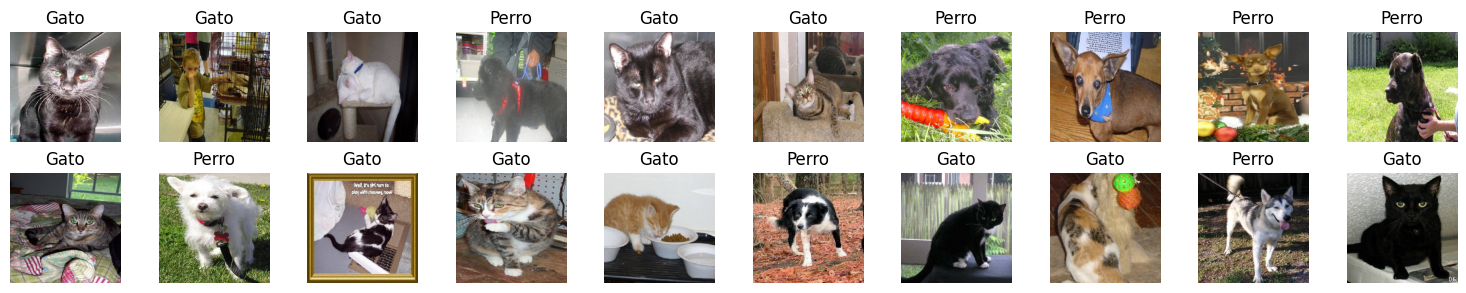

In [10]:
# Mostrar algunas imágenes de del dataset TEST con sus etiquetas

plt.figure(figsize=(15, 3))
indices = np.random.choice(range(len(X_test)), 20, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(2, 10, i+1)
    # Convertir de vuelta el formato de preprocesamiento
    img = X_test[idx].copy()
    # Para imágenes preprocesadas con InceptionV3
    img = img / 2 + 0.5  # Aproximación para deshacer el preprocesamiento
    plt.imshow(img)
    plt.title(f"{'Perro' if y_test[idx] == 1 else 'Gato'}")
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(ruta_test, 'ejemplos_imagenes.png'))
print(f"Ejemplos guardados en {os.path.join(ruta_test, 'ejemplos_imagenes.png')}")



## Probamos el modelo base

InceptionV3 categoriza en una de entre 1000 categorías. No tiene de por si supercategorías como "cat" o "dog", entonces usaremos wordnet para ello, de forma tal de conocer las métricas del modelo ANTES de el Transfer.

Cada una de las categorías que utiliza Inceptionv3 es un Wordnet Synset (set de sinónimos)

In [11]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False, # no incluye la capa de salida
    input_shape=(299, 299, 3)
    )

# Congelamos el modelo base para que nada se modifique

base_model.trainable = False # esto impide que cambien los pesos en el back propagation

# lo compilamos
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
import nltk
assert(nltk.download('wordnet'))  # Make sure we have the wordnet data.
from nltk.corpus import wordnet as wn

def categoriza(palabra):

    for i in range(5): #cinco pasadas hasta llegar a la supercategoria de interés (gato o perro)

        synset = wn.synsets(palabra)[0]  # First meaning

        # Access hypernyms (immediate parent categories)
        hypernyms = synset.hypernyms()

        resultado = hypernyms[0].lemmas()[0].name() # no siempre categoriza de una como perro o gato (ej: tibetan mastiff> mastiff > working dog > dog)

        if (resultado == "dog"):
            return 1
        elif (resultado == "domestic_cat"):
            return 0
        else:
            palabra = resultado

    return np.nan # si no sabe retorne nan


[nltk_data] Downloading package wordnet to /root/nltk_data...


### Predicción

In [13]:
# import keras
import keras
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

contador = 0
folders = [
    ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/cat', 0),
    ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/dog', 1)
]

resultados= {'img':[], 'real':[], 'prediccion':[]}

for folder, label in folders:
    if label == 0:
        print(f"\nProcesando imágenes de perros")
    else:
        print(f"\nProcesando imágenes de gatos")
    for img_file in os.listdir(folder):
        if img_file.endswith('.jpg'):
            try:
                # Load and preprocess
                img = load_img(os.path.join(folder, img_file), target_size=(299, 299))
                x = img_to_array(img)
                x = preprocess_input(x)
                x = np.expand_dims(x, axis=0)

                # Predict
                preds = model.predict(x)
                decoded = decode_predictions(preds, top=1)[0][0]
                if categoriza(decoded[1]) == 0:
                    predicho = "perro"
                elif categoriza(decoded[1]) == 1:
                    predicho = "gato"
                else:
                    predicho = np.nan

                print(f"predicho: {predicho}")

                # Print results
                print(f"{img_file}: {decoded[1]} ({decoded[2]:.2%})")
                resultados['img'].append(img_file)
                resultados['real'].append(label)
                resultados['prediccion'].append(categoriza(decoded[1]))
                print(categoriza(decoded[1]))
                if preds[0][0] > 0.5:
                    print("perro")
                else:
                    print("gato")



                contador += 1
            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")

print(f"Se procesaron {contador} imágenes")





Procesando imágenes de perros
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
predicho: nan
cat.12485.jpg: tiger_cat (52.46%)
nan
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicho: perro
cat.12487.jpg: tabby (71.77%)
0
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicho: perro
cat.12482.jpg: Egyptian_cat (80.95%)
0
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicho: perro
cat.12480.jpg: tabby (39.89%)
0
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicho: perro
cat.12484.jpg: tabby (41.38%)
0
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicho: perro
cat.12486.jpg: Egyptian_cat (36.39%)
0
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicho: gato
cat.12481.jpg: West_Highland_white_terrier (29.65%)
1
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicho: nan
cat.12483.jpg: carton (12.12%)
nan
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicho: nan
cat.12494.jpg: hamper (10.73%)
nan
gato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicho: nan
cat.12493.jpg:

Hacemos un dataframe con los resultados del modelo base:
* 1 = perro
* 0 = gato
* Nan = otro

In [14]:
df = pd.DataFrame(resultados)
df['correcto'] = df['real'] == df['prediccion']

df.head(40)

img  real  prediccion  correcto
0   cat.12485.jpg     0         NaN     False
1   cat.12487.jpg     0         0.0      True
2   cat.12482.jpg     0         0.0      True
3   cat.12480.jpg     0         0.0      True
4   cat.12484.jpg     0         0.0      True
5   cat.12486.jpg     0         0.0      True
6   cat.12481.jpg     0         1.0     False
7   cat.12483.jpg     0         NaN     False
8   cat.12494.jpg     0         NaN     False
9   cat.12493.jpg     0         NaN     False
10  cat.12495.jpg     0         0.0      True
11  cat.12498.jpg     0         0.0      True
12  cat.12497.jpg     0         0.0      True
13  cat.12488.jpg     0         0.0      True
14  cat.12492.jpg     0         0.0      True
15  cat.12490.jpg     0         0.0      True
16  cat.12499.jpg     0         1.0     False
17  cat.12491.jpg     0         0.0      True
18  cat.12489.jpg     0         0.0      True
19  cat.12496.jpg     0         NaN     False
20  dog.12489.jpg     1         NaN     False
21  dog.12484.jpg     1         1.0      True
22  dog.12493.jpg     1         1.0      True
23  dog.12486.jpg     1         NaN     False
24  dog.12492.jpg     1         NaN     False
25  dog.12491.jpg     1         1.0      True
26  dog.12485.jpg     1         1.0      True
27  dog.12482.jpg     1         1.0      True
28  dog.12490.jpg     1         1.0      True
29  dog.12497.jpg     1         1.0      True
30  dog.12483.jpg     1         1.0      True
31  dog.12487.jpg     1         1.0      True
32  dog.12480.jpg     1         NaN     False
33  dog.12494.jpg     1         1.0      True
34  dog.12496.jpg     1         1.0      True
35  dog.12499.jpg     1         1.0      True
36  dog.12498.jpg     1         NaN     False
37  dog.12481.jpg     1         1.0      True
38  dog.12495.jpg     1         1.0      True
39  dog.12488.jpg     1         1.0      True

## Métricas del modelo base

Ahora obtenemos las métricas del modelo base

In [15]:
# Calcular precisión, recall y f1 sobre resultados

# Calcular métricas directamente desde la columna 'correcto'
total = len(df)
correctos = df['correcto'].sum()
incorrectos = total - correctos

accuracy = correctos / total
error_rate = incorrectos / total

print(f"Exactitud (Accuracy): {accuracy:.2%}")
print(f"Tasa de error: {error_rate:.2%}")

# Conteo de verdaderos positivos (TP) y falsos positivos (FP)
tp = ((df['real'] == 1) & (df['correcto'] == 1)).sum()
fp = ((df['real'] == 0) & (df['correcto'] == 0)).sum()
fn = ((df['real'] == 1) & (df['correcto'] == 0)).sum()

# Cálculo de métricas (con protección contra división por cero)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecisión: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Exactitud (Accuracy): 70.00%
Tasa de error: 30.00%

Precisión: 68.18%
Recall: 75.00%
F1-score: 71.43%


# Modelo para Transfer Learning

El transfer learning es cuando tenemos un dataset reducido de entrenamiento, y  utilizamos un modelo de CNN previamente entrenado y lo utilizamos como punto de partida para entrenarlo con el dataset que tenemos.

El modelo de reutilización será el Total.

Los pasos que realizaremos serán los siguientes:

1. Tomar el modelo de InceptionV3 y congelar todas las capas menos la última (la capa densa de la predicción), para no detruir la estructura del modelo.

2. Agregar nuevas capas entrenables sobre las ya existentes y entrenarlas con el dataset de entrenamiento. Estas capas tomarán los features del modelo base y aprenderán a clasificar según el nuevo dataset.

3. Entrenar las nuevas capas.


## Instanciamos el modelo nuevamente

In [16]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False, # no incluye la capa de salida
    input_shape=(299, 299, 3)
    )

# Congelamos el modelo base para que nada se modifique

base_model.trainable = False # esto impide que cambien los pesos en el back propagation


In [17]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

## Agregamos nuevas capas

Observamos que la última capa tiene las dimensiones **(None, 8, 8, 2048)**. Esto lo consideraremos para crear la red que le anexaremos.

In [18]:
# usando Sequential, agregamos capas al modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

# Crear modelo secuencial
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(100, activation='relu'),
    BatchNormalization(),  # Estabiliza el aprendizaje
    Dropout(0.3),         # Regularización
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo (ajusta el optimizer y loss según el problema)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # mejor para clasificación binaria
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_282         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        51,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_283         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,062,357 (84.16 MB)

 Trainable params: 258,349 (1009.18 KB)

 Non-trainable params: 21,804,008 (83.18 MB)

## Ajustamos el nuevo modelo

### Cargar datos de entrenamiento

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os

# Define folders and labels
folders = [
    ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/train/cat', 0),
    ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/train/dog', 1)
]

# Initialize empty lists to store images and labels
all_images = []
all_labels = []

for folder, label in folders:
    for img_file in os.listdir(folder):
        if img_file.lower().endswith('.jpg'):
            try:
                # Load and preprocess image
                img = load_img(os.path.join(folder, img_file), target_size=(299, 299))
                x = img_to_array(img)
                x = preprocess_input(x)
                x = np.expand_dims(x, axis=0)





                # Append to lists
                all_images.append(x)
                all_labels.append(label) # no es perro, es gato

            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}") #había un archivo con nombre de archivo incorrecto, se eliminó
                continue

Generamos una muestra de 20 imágenes para asegurarnos que las etiquetas están correctas

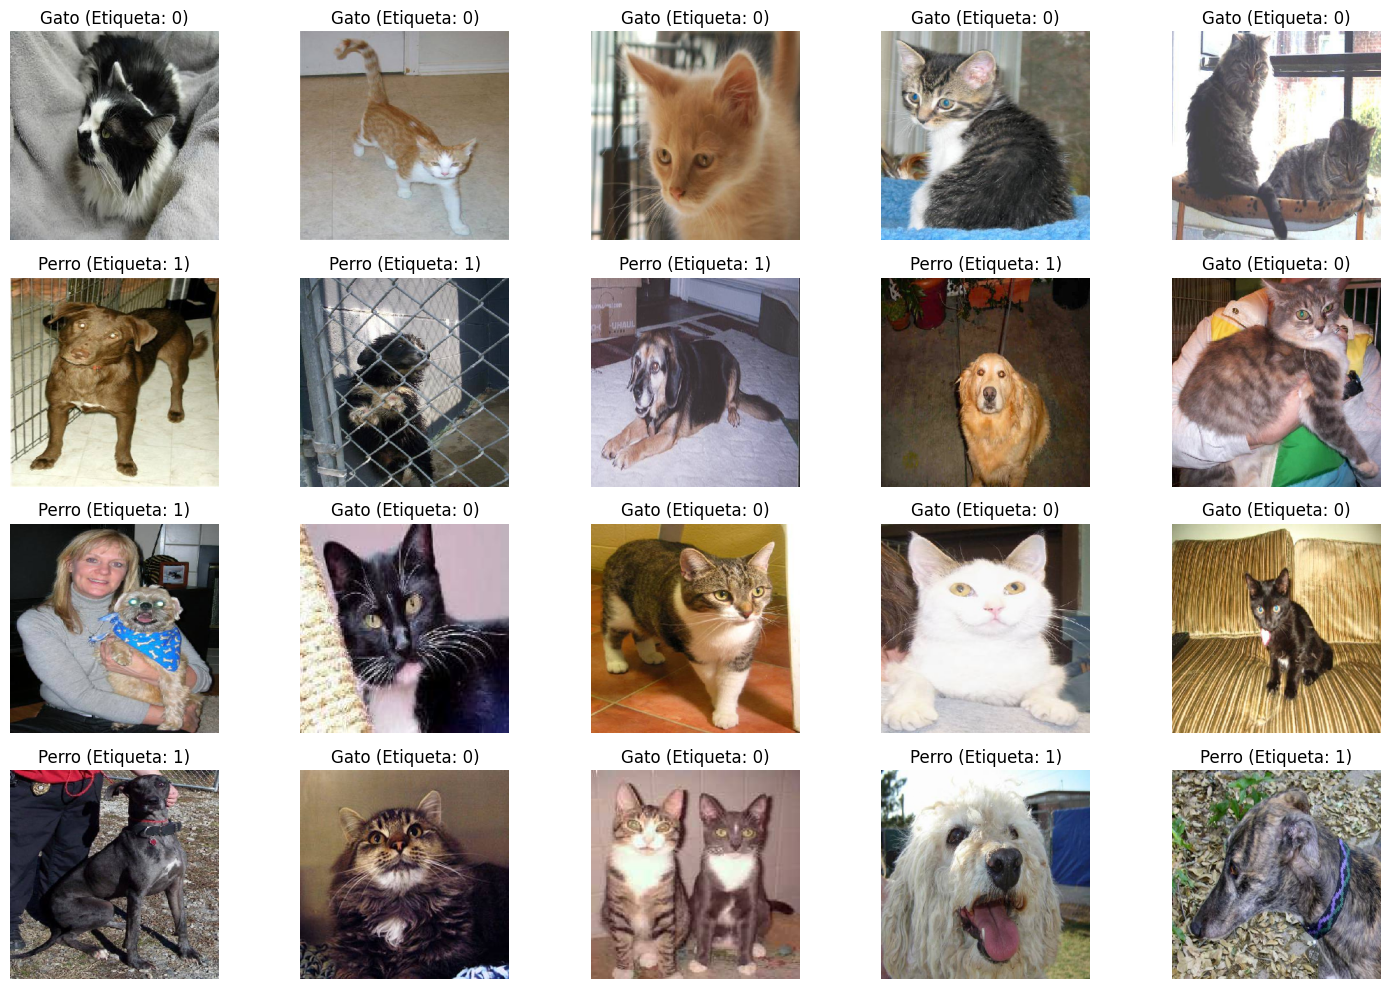

Resumen de etiquetas:
Imagen 1: Gato (Etiqueta: 0)
Imagen 2: Gato (Etiqueta: 0)
Imagen 3: Gato (Etiqueta: 0)
Imagen 4: Gato (Etiqueta: 0)
Imagen 5: Gato (Etiqueta: 0)
Imagen 6: Perro (Etiqueta: 1)
Imagen 7: Perro (Etiqueta: 1)
Imagen 8: Perro (Etiqueta: 1)
Imagen 9: Perro (Etiqueta: 1)
Imagen 10: Gato (Etiqueta: 0)
Imagen 11: Perro (Etiqueta: 1)
Imagen 12: Gato (Etiqueta: 0)
Imagen 13: Gato (Etiqueta: 0)
Imagen 14: Gato (Etiqueta: 0)
Imagen 15: Gato (Etiqueta: 0)
Imagen 16: Perro (Etiqueta: 1)
Imagen 17: Gato (Etiqueta: 0)
Imagen 18: Gato (Etiqueta: 0)
Imagen 19: Perro (Etiqueta: 1)
Imagen 20: Perro (Etiqueta: 1)


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Convert existing lists to numpy arrays
images_array = np.array([img[0] for img in all_images])  # Remove the extra dimension
labels_array = np.array(all_labels)

# Choose 20 random indices
if len(images_array) >= 20:
    indices = random.sample(range(len(images_array)), 20)
else:
    indices = range(len(images_array))  # Use all if less than 20

# Set up the plot
plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    plt.subplot(4, 5, i+1)

    # Get the image and convert back from preprocessing for display
    img = images_array[idx].copy()

    # Reverse the preprocessing to make the image displayable
    # For InceptionV3 preprocess_input, we need to approximately reverse it:
    img = img / 2.0 + 0.5  # Scale to [0,1] range

    plt.imshow(img)
    label_text = "Perro" if labels_array[idx] == 1 else "Gato"
    plt.title(f"{label_text} (Etiqueta: {labels_array[idx]})")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print the actual labels for these samples
print("Resumen de etiquetas:")
for i, idx in enumerate(indices):
    label_text = "Perro" if labels_array[idx] == 1 else "Gato"
    print(f"Imagen {i+1}: {label_text} (Etiqueta: {labels_array[idx]})")


Convertimos la lista a TensorFLow Dataset, con imágenes y etiquetas.

In [21]:
# crear dataset
dataset = tf.data.Dataset.from_tensor_slices((all_images, all_labels))



In [22]:
# Convert dataset to have dummy batch dim
train_data = dataset.map(lambda x, y: (tf.expand_dims(x, 0),
                                      tf.expand_dims(y, 0)))

batch_size = 32
train_data = dataset.batch(batch_size)


In [23]:
dataset_redim = train_data.map(lambda image, label: (tf.squeeze(image, axis=1), label))


In [24]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Convert labels to categorical format for categorical_crossentropy
from tensorflow.keras.utils import to_categorical



In [25]:

# Create a fresh dataset with correct dimensions
new_dataset = tf.data.Dataset.from_tensor_slices((
    tf.squeeze(tf.stack(all_images), axis=1),  # Remove extra dimension

    all_labels
))


In [73]:
def entrenar(epochs):
    dicc_Resultados = {'epochs' : [],
                       'accuracy' : [],
                       'error_rate' : [],
                       'precision' : [],
                       'recall' : [],
                       'f1': []
                       }
    for epoch in epochs:
        print(f"Entrenando modelo con {epoch} epochs")
        # Batch and prefetch
        train_dataset = new_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


        # Train
        model.fit(
            train_dataset,
            epochs=epoch,
            steps_per_epoch=len(all_images)//32
        )


        # Convertir a numpy arrays
        X_test = np.array(imagenes)
        y_test = np.array(etiquetas)


        test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
        test_data = test.map(lambda x, y: (tf.expand_dims(x, 0), tf.expand_dims(y, 0))).batch(20)


        contador = 0
        folders = [
            ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/cat', 0),
            ('/content/drive/MyDrive/Data_Science/DeepLearning/Rodrigo/Capstone/test/dog', 1)
        ]

        resultados= {'img':[], 'real':[], 'prediccion':[]}


        for folder, label in folders:

            for img_file in os.listdir(folder):
                if img_file.endswith('.jpg'):
                    try:
                        # Load and preprocess
                        img = load_img(os.path.join(folder, img_file), target_size=(299, 299))
                        x = img_to_array(img)
                        x = preprocess_input(x)
                        x = np.expand_dims(x, axis=0)


                        # Predicciones


                        predictions = model.predict(x)


                        predicted_class = "dog" if predictions[0][0] > 0.5 else "cat"
                        if img_file.startswith('cat'):
                            actual_class = "cat"
                        elif img_file.startswith('dog'):
                            actual_class = "dog"

                        # Store results
                        print(f"Procesando {img_file}")
                        print(f"Predicción: {predicted_class}, Real: {actual_class}, prediccion: {predictions[0][0]}")

                        resultados['img'].append(f"img_{contador}")
                        if img_file.startswith("cat"):
                            actual_class = "cat"
                        elif img_file.startswith("dog"):
                            actual_class = "dog"
                        resultados['real'].append(actual_class)
                        resultados['prediccion'].append(predicted_class)


                        contador += 1
                    except Exception as e:
                        print(f"Error processing {img_file}: {str(e)}")

        print(f"Se procesaron {contador} imágenes")


        df_results = pd.DataFrame(resultados)

        df_results['correcto'] = df_results['real'] == df_results['prediccion']




        # Calcular métricas directamente desde la columna 'correcto'
        total = len(df_results)
        correctos = df_results['correcto'].sum()
        incorrectos = total - correctos

        accuracy = correctos / total
        error_rate = incorrectos / total

        print(f"Exactitud (Accuracy): {accuracy:.2%}")
        print(f"Tasa de error: {error_rate:.2%}")

        df_results['tp'] = df_results['real'] == df_results['prediccion']
        df_results['fp'] = (df_results['prediccion'] == 'dog') & (~df_results['correcto'])
        df_results['fn'] = (df_results['prediccion'] == 'cat') & (~df_results['correcto'])

        # Conteo de verdaderos positivos (TP) y falsos positivos (FP)
        tp = df_results['tp'].sum()
        fp = df_results['fp'].sum()
        fn = df_results['fn'].sum()

        # Cálculo de métricas (con protección contra división por cero)
        print(f"MÉTRICAS CON {epoch} epochs")
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"\nPrecisión: {precision:.2%}")
        print(f"Recall: {recall:.2%}")
        print(f"F1-score: {f1:.2%}")
        dicc_Resultados['epochs'].append(epoch)
        dicc_Resultados['accuracy'].append(accuracy)
        dicc_Resultados['error_rate'].append(error_rate)
        dicc_Resultados['precision'].append(precision)
        dicc_Resultados['recall'].append(recall)
        dicc_Resultados['f1'].append(f1)

    return pd.DataFrame(dicc_Resultados)


In [81]:
resultados = entrenar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20])

Entrenando modelo con 1 epochs
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5701 - loss: 0.6914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5927338004112244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.38923120498657227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.4467369318008423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.4040648341178894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.5473302006721497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12486.jpg
Predicción: cat, Real: cat, prediccion: 0.462337851524353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12481.jpg
Predicción: dog, Real: cat, prediccion: 0.5429942607879639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
P

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.39211103320121765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.461605042219162
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.3893304467201233
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.5626084208488464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12486.jpg
Predicción: cat, Real: cat, prediccion: 0.4761171042919159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12481.jpg
Predicción: cat, Real: cat, prediccion: 0.49322643876075745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12483.jpg
Predicción: cat, Real: cat, prediccion: 0.35542094707489014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12494.jpg
Predicción: dog, Real: cat, prediccion: 0.5400791168212891
1/1 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5847 - loss: 0.6894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5713558197021484
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.3690609633922577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.3962392210960388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.3657509684562683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.5367728471755981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12486.jpg
Predicción: cat, Real: cat, prediccion: 0.47505712509155273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12481.jpg
Predicción: dog, Real: cat, prediccion: 0.5277246832847595
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12483.jpg
Predic

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5823 - loss: 0.6809
Epoch 4/4
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.8932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5680310130119324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.4004107713699341
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.4063601493835449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.392623633146286
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.5336786508560181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12486.jpg
Predicción: cat, Real: cat, prediccion: 0.46462029218673706
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12481.jpg
Predicción: dog, Real: cat, prediccion: 0.5

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5782 - loss: 0.6908
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.4000 - loss: 0.7720
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5836 - loss: 0.6849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5507052540779114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.3893338143825531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.40961119532585144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.43013349175453186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.5086953639984131
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12486.jpg
Predicción: cat, Real: cat, prediccion: 0.4658434987068176
1/1 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5851 - loss: 0.6748
Epoch 4/6
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.8008
Epoch 5/6
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5985 - loss: 0.6776
Epoch 6/6
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.4000 - loss: 0.8579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.535960853099823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.3770042359828949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.40129053592681885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.39689937233924866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, prediccion: 0.517252504825592
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.124

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5802 - loss: 0.6894
Epoch 4/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.8926
Epoch 5/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5811 - loss: 0.6829
Epoch 6/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.6000 - loss: 0.8094
Epoch 7/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5818 - loss: 0.6886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5653496980667114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.3880499005317688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.42149776220321655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.4154486060142517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12484.jpg
Predicción: dog, Real: cat, 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5770 - loss: 0.6831
Epoch 4/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 1.0501
Epoch 5/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5854 - loss: 0.6817
Epoch 6/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.4000 - loss: 0.8184
Epoch 7/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5951 - loss: 0.6727
Epoch 8/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.2000 - loss: 1.1428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12485.jpg
Predicción: cat, Real: cat, prediccion: 0.4730682969093323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.38790661096572876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.4110359847545624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12480.jpg
Predicción: cat, Real: cat, prediccion: 0.4591843783855438
1/1 ━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6025 - loss: 0.6655
Epoch 4/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.6000 - loss: 0.6715
Epoch 5/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5864 - loss: 0.6798
Epoch 6/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.2000 - loss: 0.8459
Epoch 7/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5898 - loss: 0.6782
Epoch 8/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.4000 - loss: 0.8430
Epoch 9/9
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5981 - loss: 0.6702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.552418053150177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.40231284499168396
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Procesando cat.12482.jpg
Predicción: cat, Real: cat, prediccion: 0.44421276450157166
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Pro

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5849 - loss: 0.6746
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.8000 - loss: 0.5769
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5728 - loss: 0.6807
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 1.1376
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5808 - loss: 0.6787
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.4000 - loss: 0.9863
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5988 - loss: 0.6692
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.2000 - loss: 1.2109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Procesando cat.12485.jpg
Predicción: dog, Real: cat, prediccion: 0.5049352049827576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Procesando cat.12487.jpg
Predicción: cat, Real: cat, prediccion: 0.4049246907234192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Procesando cat.12482.jpg
Pre

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5875 - loss: 0.6810
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.4000 - loss: 0.8125
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5969 - loss: 0.6663
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.4000 - loss: 0.8061
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6076 - loss: 0.6661
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.2000 - loss: 1.1513
Epoch 9/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6045 - loss: 0.6645
Epoch 10/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.9161
Epoch 11/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6046 - loss: 0.6659
Epoch 12/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.8435
Epoch 13/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6030 - loss: 0.6647
Epoch 14/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/s

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5952 - loss: 0.6656
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.4000 - loss: 0.9557
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5903 - loss: 0.6676
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.6000 - loss: 0.8126
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5914 - loss: 0.6708
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.8702
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6101 - loss: 0.6695
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.6000 - loss: 0.6132
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6013 - loss: 0.6688
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.4000 - loss: 0.7135
Epoch 13/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.6137 - loss: 0.6595
Epoch 14/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 24

In [75]:
resultados

epochs  accuracy  error_rate  precision    recall        f1
0       1     0.625       0.375   0.757576  0.781250  0.769231
1       2     0.550       0.450   0.709677  0.709677  0.709677
2       3     0.525       0.475   0.700000  0.677419  0.688525
3       4     0.525       0.475   0.700000  0.677419  0.688525
4       5     0.525       0.475   0.677419  0.700000  0.688525
5       6     0.625       0.375   0.781250  0.757576  0.769231
6       7     0.675       0.325   0.870968  0.750000  0.805970
7       8     0.725       0.275   0.935484  0.763158  0.840580
8       9     0.650       0.350   0.866667  0.722222  0.787879
9      10     0.700       0.300   0.903226  0.756757  0.823529

Estas son las métricas del modelo original

```
Exactitud (Accuracy): 70.00%
Tasa de error: 30.00%

Precisión: 68.18%
Recall: 75.00%
F1-score: 71.43%
```



Ahora graficamos como líneas horizontales las métricas del modelo original, y en curvas las métricas del modelo modificando las epochs.

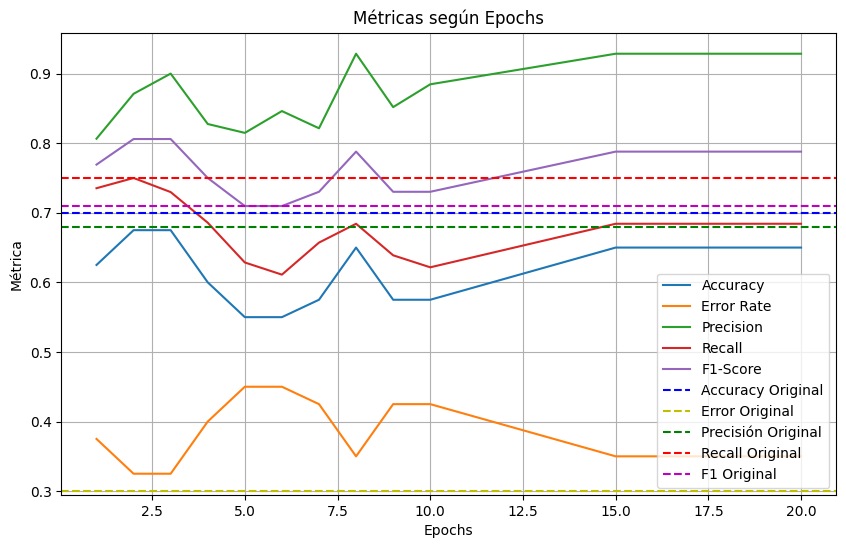

In [82]:
#graficamos las curvas para cada métrica a partir del df 'resultados'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(resultados['epochs'], resultados['accuracy'], label='Accuracy')
plt.plot(resultados['epochs'], resultados['error_rate'], label='Error Rate')
plt.plot(resultados['epochs'], resultados['precision'], label='Precision')
plt.plot(resultados['epochs'], resultados['recall'], label='Recall')
plt.plot(resultados['epochs'], resultados['f1'], label='F1-Score')

# traza una linea horizontal para cada métrica del modelo original, usando los colores correspondientes.
"""
Exactitud (Accuracy): 70.00%
Tasa de error: 30.00%

Precisión: 68.18%
Recall: 75.00%
F1-score: 71.43%
"""
plt.axhline(y=0.7, color='b', linestyle='--', label='Accuracy Original')
plt.axhline(y=0.3, color='y', linestyle='--', label='Error Original')
plt.axhline(y=0.68, color='g', linestyle='--', label='Precisión Original')
plt.axhline(y=0.75, color='r', linestyle='--', label='Recall Original')
plt.axhline(y=0.71, color='m', linestyle='--', label='F1 Original')


plt.xlabel('Epochs')
plt.ylabel('Métrica')
plt.title('Métricas según Epochs')
plt.legend()
plt.grid(True)
plt.show()





# Conclusiones

##Sobre el entrenamiento con InceptionV3

* El modelo InceptionV3 fue pre-entrenado con 1.2 millones de imágenes del dataset ImageNet, lo que proporciona una base robusta de características extraídas. Esto explica por qué nuestro dataset para transfer learning no requiere tantos epochs para conseguir buenos resultados.

* Se utilizó un learning rate bajo (0.00001) para el fine-tuning, lo cual es óptimo cuando se trabaja con modelos pre-entrenados. Esta decisión se validó empíricamente al probar valores mayores que resultaron en peor desempeño, confirmando que ajustes más sutiles preservan mejor el conocimiento transferido.

* Los experimentos demostraron que 8 epochs proporcionaron el equilibrio óptimo entre aprendizaje y generalización. Esto refuerza la idea de que con transfer learning se logra convergencia en menos iteraciones.

## Sobre la arquitectura y métricas

* Para este problema de clasificación binaria de imágenes, se mantuvo binary_crossentropy como función de pérdida, siendo la elección estándar para problemas de este tipo.

* La métrica de accuracy se utilizó como indicador principal de rendimiento, apropiada para este conjunto de datos que está balanceado entre las clases.

